# Pose Detection with AlphaPhose

This notebook uses an open source project [MVIG-SJTU/AlphaPose](https://github.com/MVIG-SJTU/AlphaPose) to detect/track multi person poses on a given youtube video.

For other deep-learning Colab notebooks, visit [tugstugi/dl-colab-notebooks](https://github.com/tugstugi/dl-colab-notebooks).


## Install AlphaPose

In [1]:
# ! pip3 install torch torchvision --extra-index-url https://download.pytorch.org/whl/cu113
! pip3 install torch==1.12.1+cu113 torchvision==0.13.1+cu113 torchaudio==0.12.1 --extra-index-url https://download.pytorch.org/whl/cu113
! pip install scipy
! pip install pillow==6.2.2
! pip install pyyaml
! pip install tqdm matplotlib nibabel pandas opencv-python

Looking in indexes: https://pypi.org/simple, https://download.pytorch.org/whl/cu113


In [2]:
!python -m pip install cython
!sudo apt-get install libyaml-dev

Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
libyaml-dev is already the newest version (0.2.2-1build2).
0 upgraded, 0 newly installed, 0 to remove and 49 not upgraded.


In [4]:
import os
! rm -rf /content/AlphaPose
os.chdir('/content/')

In [ ]:
# ! git clone https://github.com/MVIG-SJTU/AlphaPose.git
# os.chdir('/content/AlphaPose')
# print(os.getcwd())
# ! python setup.py build develop

In [5]:
import os
from os.path import exists, join, basename, splitext

import time
import matplotlib
import matplotlib.pylab as plt
plt.rcParams["axes.grid"] = False

from IPython.display import YouTubeVideo

git_repo_url = 'https://github.com/MVIG-SJTU/AlphaPose.git'
project_name = splitext(basename(git_repo_url))[0]
if not exists(project_name):
  # clone and install dependencies
  !git clone -q -b pytorch --depth 1 $git_repo_url
  # !cd $project_name && pip install -q -r requirements.txt

import sys
sys.path.append(project_name)

## Download pretrained models

In [6]:
! pip install gdown

In [18]:
import gdown
import requests

# Replace 'your-file-id' with the actual file ID from Google Drive
file_id = '1OPORTWB2cwd5YTVBX-NE8fsauZJWsrtW'
pretrained_model_path = join(project_name, 'models/sppe/duc_se.pth')
gdown.download(f"https://drive.google.com/uc?id={file_id}", pretrained_model_path, quiet=False)

# yolo_file_id = '1D47msNOOiJKvPOXlnpyzdKA3k6E97NTC'
yolo_pretrained_model_path = join(project_name, 'models/yolo/yolov3-spp.weights')
# gdown.download(f"https://drive.google.com/uc?id={file_id}", yolo_pretrained_model_path, quiet=False)

# Make a GET request to download the file
response = requests.get("https://pjreddie.com/media/files/yolov3-spp.weights", stream=True)

# Save the file to your local system
with open(yolo_pretrained_model_path, 'wb') as file:
    for chunk in response.iter_content(chunk_size=1024):
        if chunk:
            file.write(chunk)

Downloading...
From (original): https://drive.google.com/uc?id=1OPORTWB2cwd5YTVBX-NE8fsauZJWsrtW
From (redirected): https://drive.google.com/uc?id=1OPORTWB2cwd5YTVBX-NE8fsauZJWsrtW&confirm=t&uuid=3960a93a-0b96-4867-9cfd-54dc2ee66f6b
To: /content/AlphaPose/models/sppe/duc_se.pth
100%|██████████| 239M/239M [00:01<00:00, 159MB/s]


In [ ]:
## fix code from
# /content/AlphaPose/fn.py
# from torch._six import string_classes
# int_classes = int


## Detect poses on a test video

We are going to detect poses on the following youtube video:

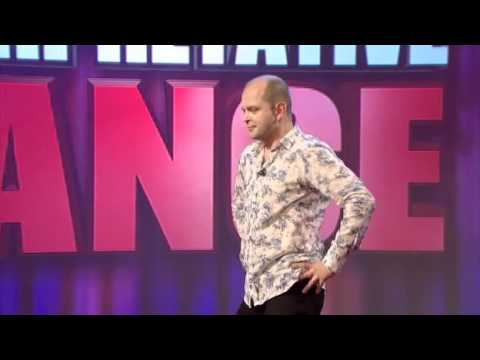

In [8]:
YOUTUBE_ID = '0vnMdFmZ3P8'


YouTubeVideo(YOUTUBE_ID)

Download the above youtube video, cut the first 5 seconds and do the pose detection on that 5 seconds:

In [9]:
! sudo curl -L https://github.com/yt-dlp/yt-dlp/releases/latest/download/yt-dlp -o /usr/local/bin/yt-dlp
! sudo chmod a+rx /usr/local/bin/yt-dlp

  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
  0     0    0     0    0     0      0      0 --:--:-- --:--:-- --:--:--     0
  0     0    0     0    0     0      0      0 --:--:-- --:--:-- --:--:--     0
100 2896k  100 2896k    0     0  2880k      0  0:00:01  0:00:01 --:--:-- 7934k


In [10]:
! pwd
! ls

/content
AlphaPose  sample_data	video.mp4  youtube.mp4


In [11]:
# ! cd ..
# ! pwd

In [ ]:
! rm -df youtube.mp4
# download the youtube with the given ID
! yt-dlp -f 'bestvideo[ext=mp4]' --output "youtube.%(ext)s" https://www.youtube.com/watch?v=$YOUTUBE_ID
# cut the first 5 seconds
!ffmpeg -y -loglevel info -i youtube.mp4 -t 5 video.mp4

In [21]:
# run AlphaPose_video on these 5 seconds video
# !rm -rf AlphaPose_video.avi

!cd AlphaPose && python3 video_demo.py --sp --video ../video.mp4 --outdir .. --save_video --vis_fast
#! python3 AlphaPose/video_demo.py --sp --video video.mp4 --outdir . --save_video

# convert the result into MP4
!ffmpeg -y -loglevel info -i AlphaPose_video.avi AlphaPose_video.mp4

Loading YOLO model..
Loading pose model from ./models/sppe/duc_se.pth
100% 125/125 [00:14<00:00,  8.64it/s]
===========================> Finish Model Running.
ffmpeg version 4.4.2-0ubuntu0.22.04.1 Copyright (c) 2000-2021 the FFmpeg developers
  built with gcc 11 (Ubuntu 11.2.0-19ubuntu1)
  configuration: --prefix=/usr --extra-version=0ubuntu0.22.04.1 --toolchain=hardened --libdir=/usr/lib/x86_64-linux-gnu --incdir=/usr/include/x86_64-linux-gnu --arch=amd64 --enable-gpl --disable-stripping --enable-gnutls --enable-ladspa --enable-libaom --enable-libass --enable-libbluray --enable-libbs2b --enable-libcaca --enable-libcdio --enable-libcodec2 --enable-libdav1d --enable-libflite --enable-libfontconfig --enable-libfreetype --enable-libfribidi --enable-libgme --enable-libgsm --enable-libjack --enable-libmp3lame --enable-libmysofa --enable-libopenjpeg --enable-libopenmpt --enable-libopus --enable-libpulse --enable-librabbitmq --enable-librubberband --enable-libshine --enable-libsnappy --enable

Finally, visualize the result:

In [22]:
def show_local_mp4_video(file_name, width=640, height=480):
  import io
  import base64
  from IPython.display import HTML
  video_encoded = base64.b64encode(io.open(file_name, 'rb').read())
  return HTML(data='''<video width="{0}" height="{1}" alt="test" controls>
                        <source src="data:video/mp4;base64,{2}" type="video/mp4" />
                      </video>'''.format(width, height, video_encoded.decode('ascii')))

show_local_mp4_video('AlphaPose_video.mp4', width=960, height=720)